<h1 style="text-align:center">Health Insurance Cross Sell Prediction</h1>

<div style="text-align:center;"><img src="https://images.unsplash.com/photo-1570042707390-2e011141ab78?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1789&q=80" /></div>

**Context:** 
> Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

**About the Data:**
* id:	Unique ID for the customer
* Gender:	Gender of the customer
* Age:	Age of the customer
* Driving_License:
   * 0 : Customer does not have DL 
   * 1 : Customer already has DL
* Region_Code:	Unique code for the region of the customer
* Previously_Insured:
   * 1 : Customer already has Vehicle Insurance 
   * 0 : Customer doesn't have Vehicle Insurance
* Vehicle_Age:	Age of the Vehicle
* Vehicle_Damage:
   * 1 : Customer got his/her vehicle damaged in the past. 
   * 0 : Customer didn't get his/her vehicle damaged in the past.
* Annual_Premium:	The amount customer needs to pay as premium in the year
* PolicySalesChannel:	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage:	Number of Days, Customer has been associated with the company
* Response:
   * 1 : Customer is interested 
   * 0 : Customer is not interested

## Imports

In [1]:
# Data Processing
import numpy as np 
import pandas as pd 

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import roc_auc_score

# Exploratory Data Analysis

In [2]:
df_train = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/train.csv')
df_test = pd.read_csv('/kaggle/input/health-insurance-cross-sell-prediction/test.csv')

In [3]:
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


The `id` column is unecessary. Let's drop it for `df_train` and `df_test`.

In [5]:
df_train = df_train.drop(['id'], axis=1)
df_test = df_test.drop(['id'], axis=1)

Let's check for NaN values:

In [6]:
df_train.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df_test.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

We do not have any. That's great!

### Target Value - Response

In [8]:
df_train['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

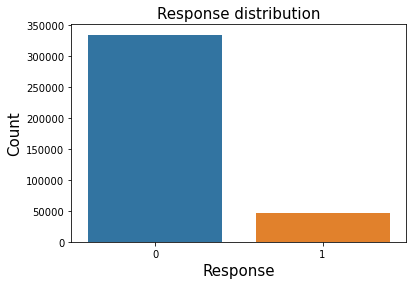

In [9]:
b = sns.countplot(x='Response', data=df_train)
b.set_title("Response distribution", fontsize=15)
b.set_xlabel("Response", fontsize=15)
b.set_ylabel("Count", fontsize=15);

We have a lot more customers that are not interested.

### Gender

In [10]:
df_train['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

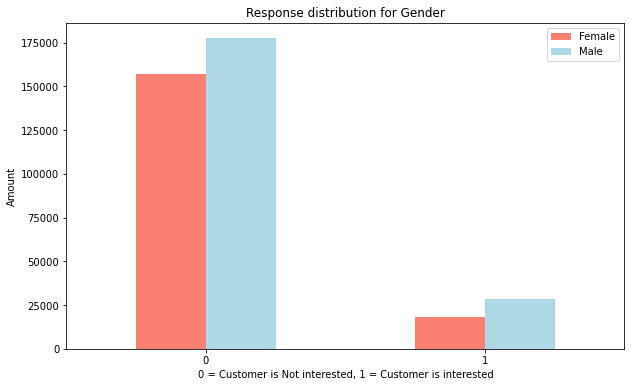

In [11]:
pd.crosstab(df_train['Response'], df_train['Gender']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Response distribution for Gender")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

Both genders seem to be pretty similar in their response.

### Driving_License

In [12]:
df_train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

There are only a small number of people with no driving license. This might mess up our models. Therefore, we should get drop `Driving_License` for now.

In [13]:
df_train = df_train.drop("Driving_License", axis=1)
df_test = df_test.drop("Driving_License", axis=1)

### Region_Code

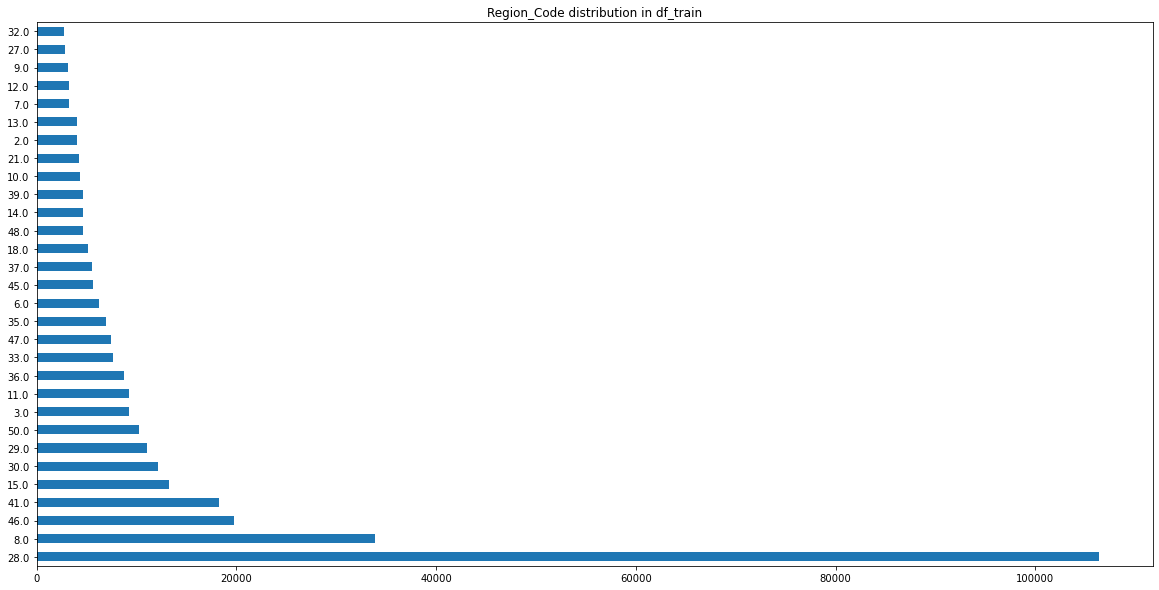

In [14]:
df_train['Region_Code'].value_counts().head(30).plot(kind='barh', figsize=(20,10), title="Region_Code distribution in df_train");

### Previously_Insured

In [15]:
df_train['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [16]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


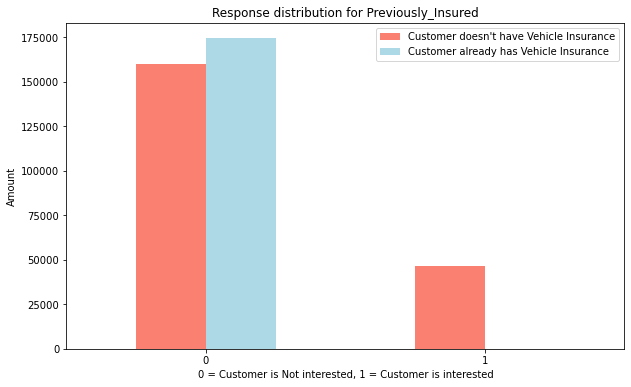

In [17]:
pd.crosstab(df_train['Response'], df_train['Previously_Insured']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Response distribution for Previously_Insured")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Customer doesn't have Vehicle Insurance", "Customer already has Vehicle Insurance"])
plt.xticks(rotation=0);

We can see that customers that already have a vehicle insurance with only very little exception are not interested.

### Vehicle_Age

In [18]:
df_train['Vehicle_Age'].value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

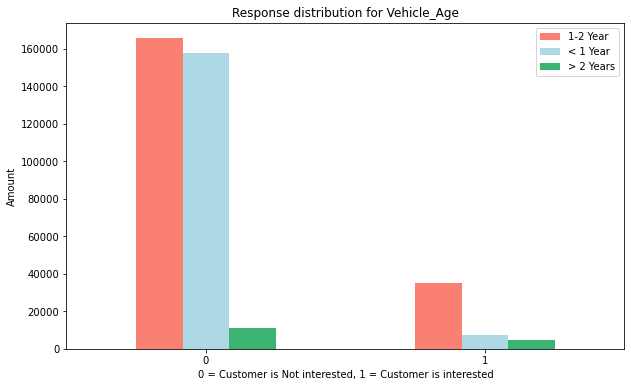

In [19]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Age']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue", "mediumseagreen"])

plt.title("Response distribution for Vehicle_Age")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["1-2 Year", "< 1 Year", "> 2 Years"])
plt.xticks(rotation=0);

### Vehicle_Damage

In [20]:
df_train['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

In [21]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Damage'])

Vehicle_Damage,No,Yes
Response,,
0,187714,146685
1,982,45728


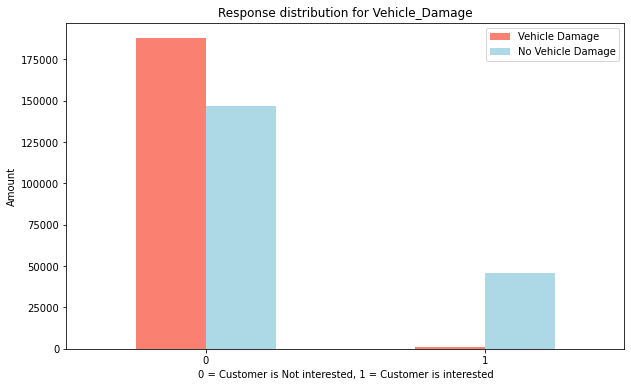

In [22]:
pd.crosstab(df_train['Response'], df_train['Vehicle_Damage']).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Response distribution for Vehicle_Damage")
plt.xlabel("0 = Customer is Not interested, 1 = Customer is interested")
plt.ylabel("Amount")
plt.legend(["Vehicle Damage", "No Vehicle Damage"])
plt.xticks(rotation=0);

### Annual_Premium

In [23]:
df_train['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

### Policy_Sales_Channel

In [24]:
df_train['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

### Vintage

In [25]:
df_train['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

## Feature Engineering

Let's take a look at our data again.

In [26]:
df_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,41.0,1,< 1 Year,No,27496.0,152.0,39,0


As a first step, we should get all our data in numeric form.

Let's map `Gender` to `0` for `Male` and `1` for `Female`:

In [27]:
gender_mapping = {
    'Male': 0,
    'Female': 1
}

df_train.loc[:, "Gender"] = df_train['Gender'].map(gender_mapping)
df_test.loc[:, "Gender"] = df_test['Gender'].map(gender_mapping)

Let's map `Vehicle_Age` to `0` for `< 1 Year`, `1` for `1-2 Year` and `2` for `> 2 Years`:

In [28]:
vehicle_age_mapping = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years' : 2
}

df_train.loc[:, "Vehicle_Age"] = df_train['Vehicle_Age'].map(vehicle_age_mapping)
df_test.loc[:, "Vehicle_Age"] = df_test['Vehicle_Age'].map(vehicle_age_mapping)

Let's map `Vehicle_Damage` to `0` for `No` and `1` for `Yes`:

In [29]:
vehicle_damage_mapping = {
    'No': 0,
    'Yes': 1
}

df_train.loc[:, "Vehicle_Damage"] = df_train['Vehicle_Damage'].map(vehicle_damage_mapping)
df_test.loc[:, "Vehicle_Damage"] = df_test['Vehicle_Damage'].map(vehicle_damage_mapping)

In [30]:
df_train.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,41.0,1,0,0,27496.0,152.0,39,0


In [31]:
df_test.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0,25,11.0,1,0,0,35786.0,152.0,53
1,0,40,28.0,0,1,1,33762.0,7.0,111
2,0,47,28.0,0,1,1,40050.0,124.0,199
3,0,24,27.0,1,0,1,37356.0,152.0,187
4,0,27,28.0,1,0,0,59097.0,152.0,297


Great! Now our data is in numeric form!

Now let's take a look at the correlation:

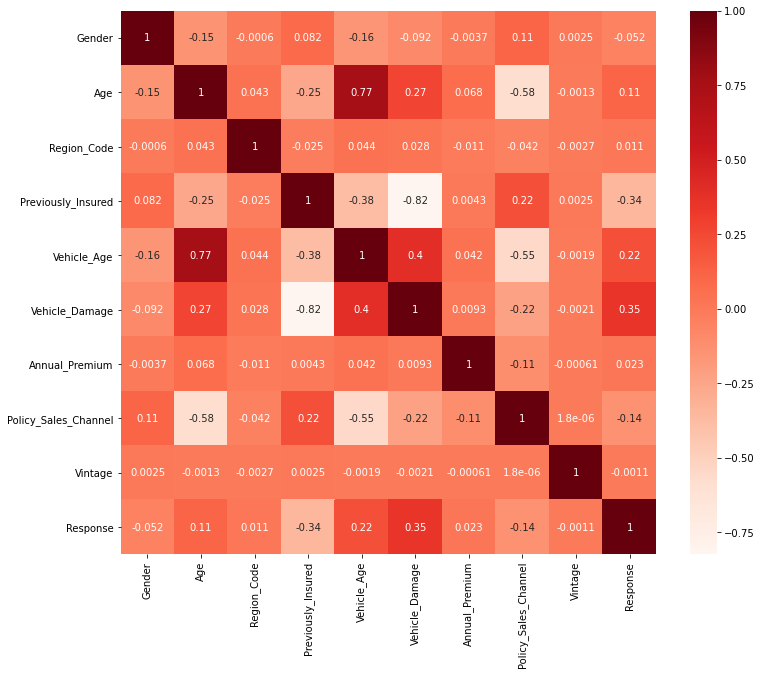

In [32]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Response has the highest correlation with `Vehicle_Damage` with `0.35` and `Vehicle_Age` with `0.22` and the highest negative correlation with `Previously_Insured` with `-0.34`.

# Modeling

Let's check the scores with all features:

In [33]:
X = df_train.drop(["Response"], axis=1)
y = df_train['Response'].values

In [34]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [35]:
np.random.seed(42)

model = SGDClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8628611162131669

In [36]:
np.random.seed(42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8716249901603211

In [37]:
np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8649602476975151

Now let's check the scores with the features that have a correlation `> 0.1` or `< -0.1` 

In [38]:
X = df_train.drop(["Response", "Gender", "Region_Code", "Annual_Premium", "Vintage"], axis=1)
y = df_train['Response'].values

In [39]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
np.random.seed(42)

model = SGDClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8750623179659416

In [41]:
np.random.seed(42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8749573613917242

In [42]:
np.random.seed(42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8732518170606911

Our models perform roughly the same. The models with a correlation of `> 0.1` or `< -0.1` only perform a little better.

# Work in Progress